In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(12,8)})

### Exploring the Data
The scraped dataset catalogues the advanced stats for almost every NBA team from 1977. The advanced stats are:
  - Team Name
  - Regular Season Wins and Loses
  - Regular Season Pythagorean Wins and Loses
    - A metric to estimate wins based on points scored/allowed
  - Average Margin of Victory
  - SOS: rating the team against the other teams relatively
  - SRS: combination rating of point differential and SOS
  - ORtg: points scored per 100 possessions
  - DRtg: points allowed per 100 possessions
  - NRtg: ORtg - DRtg
  - Pace: Approximate possesions per 48 minutes
  - FTr: FT attempts per FG attempts
  - 3PAr: 3PT attempts per FG attempts
  - TS%: overall shooting percentage
  - eFG%: Weights three point makes and attempts and two point attempts proportionally
  - TOV%: Turnovers per 100 plays
  - ORB%: Offensive rebounds per 100 plays
  - FT/FGA: free throw makes per FG attempt
  - OeFG%: Opposing eFG%
  - OTOV%: Opposing TOV%
  - DRB%: Rebounds per 100 oppertuntities
  - OFT/FTA: Opposing FT/FGA
  - Arena name
  - Season attendance
  - Game attendance

In [3]:
data = pd.read_csv('../data/teams_processed.csv')
data.head()

,Team,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,...,ORB%,FT/FGA,OeFG%,OTOV%,DRB%,OFT/FGA,Arena,Attend.,Attend./G,Year
0,Los Angeles Lakers,27.2,53,29,48,34,2.72,-0.08,2.64,101.4,...,31.0,0.188,0.452,15.6,66.1,0.194,The Forum,501434.0,12535.850,1977
1,Boston Celtics,28.7,44,38,36,46,-1.98,0.08,-1.90,96.5,...,31.1,0.212,0.450,13.4,72.8,0.204,Boston Garden,517391.0,12934.775,1977
2,New Orleans Jazz,26.1,35,47,33,49,-2.82,0.13,-2.68,97.0,...,31.0,0.222,0.452,15.5,68.2,0.238,Louisiana Superdome,441320.0,11033.000,1977
3,Los Angeles Lakers,25.8,45,37,48,34,2.67,-0.08,2.59,103.3,...,30.4,0.205,0.463,15.2,66.0,0.194,The Forum,534017.0,13350.425,1978
4,Boston Celtics,29.7,32,50,36,46,-1.95,0.09,-1.86,99.1,...,32.4,0.220,0.456,13.9,71.4,0.226,Boston Garden,437937.0,10948.425,1978


### Visualizing the Changes in the Game
Since NBA basketball has greatly evolved over the past 40 years, predictions based on every historical team would not be complete eminent of today's game. 

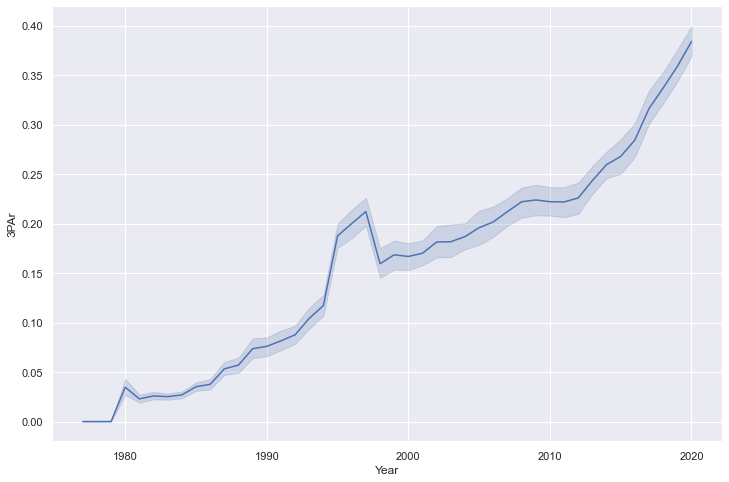

In [4]:
threepointplot = sns.lineplot(x='Year', y='3PAr', data=data)

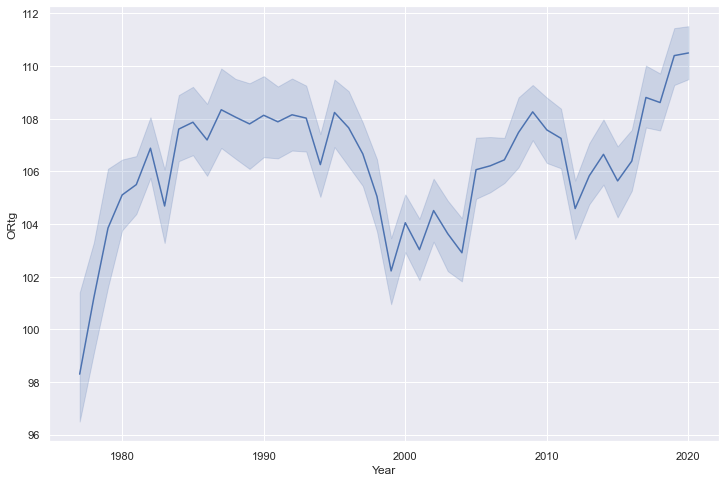

In [5]:
ofrplot = sns.lineplot(x='Year', y='ORtg', data=data)

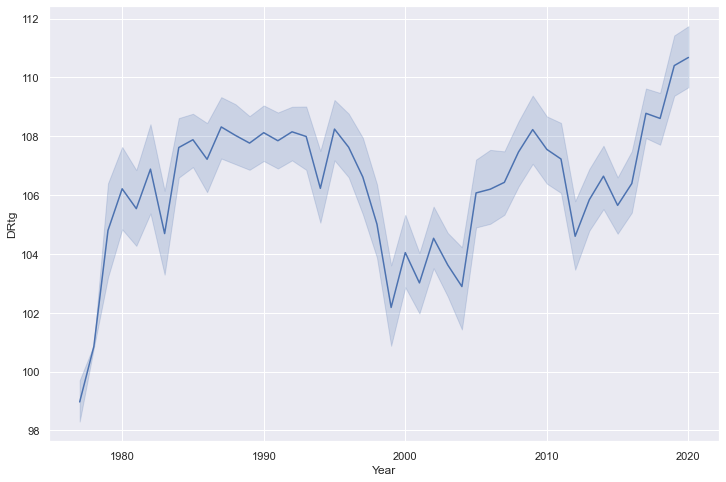

In [6]:
defrplot = sns.lineplot(x='Year', y='DRtg', data=data)

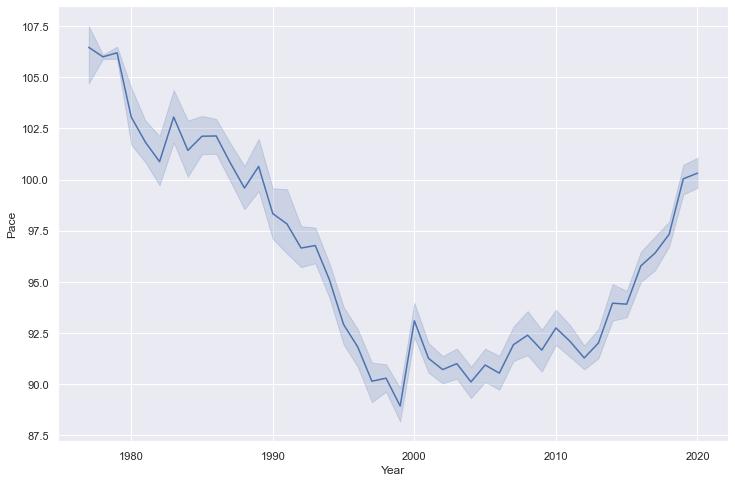

In [7]:
paceplot = sns.lineplot(x="Year", y="Pace", data=data)

### Exploring Relationships between Variables

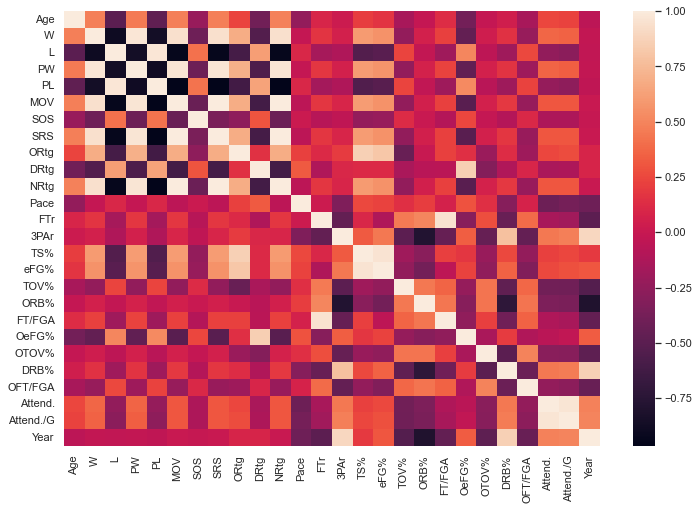

In [8]:
heatmap = sns.heatmap(data.corr())

Looking at the correlation with wins, the most promising metrics seem to be: Age, Offensive Ratings, Defensive Ratings, Nets Ratings, eFG%, TS%, TOV%, Attendance.

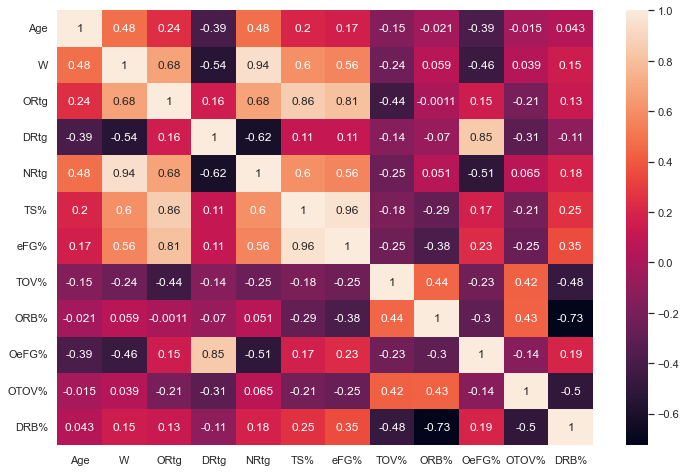

In [9]:
higher_correlated_columns = ['Age', 'W', 'ORtg', 'DRtg', 'NRtg', 'TS%', 'eFG%', 'TOV%', 'ORB%', 'OeFG%', 'OTOV%', 'DRB%']
zoomed = sns.heatmap(data[higher_correlated_columns].corr(), annot=True)

Now to explore the connection between these variables more closely.

<AxesSubplot:xlabel='ORtg', ylabel='W'>

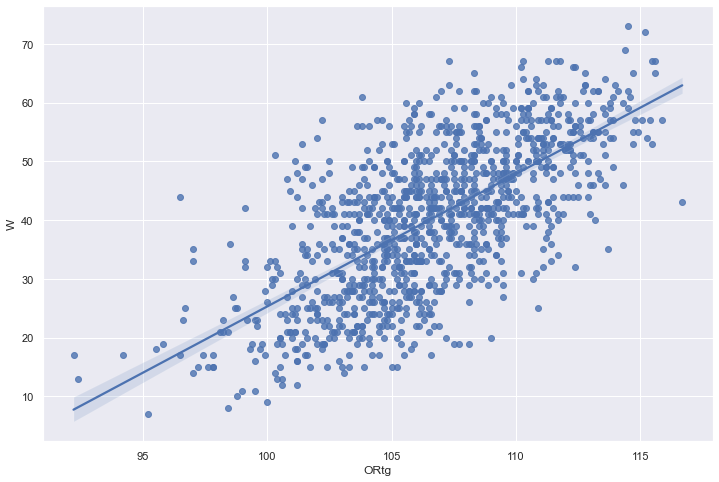

In [10]:
sns.regplot(x='ORtg', y='W', data=data)

<AxesSubplot:xlabel='DRtg', ylabel='W'>

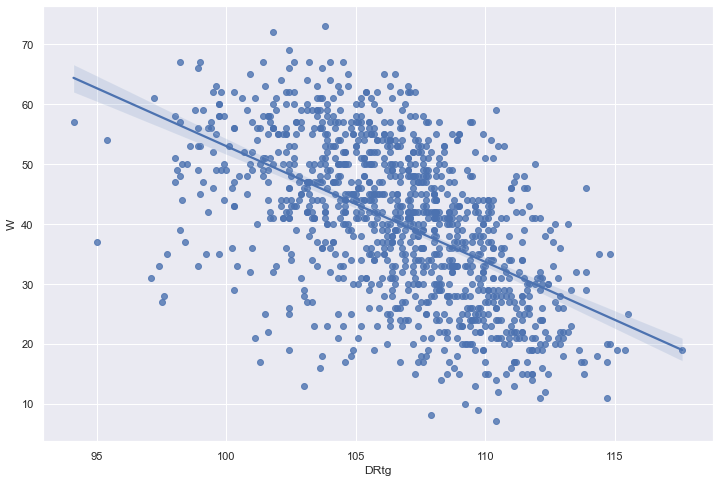

In [11]:
sns.regplot(x='DRtg', y='W', data=data)

<AxesSubplot:xlabel='NRtg', ylabel='W'>

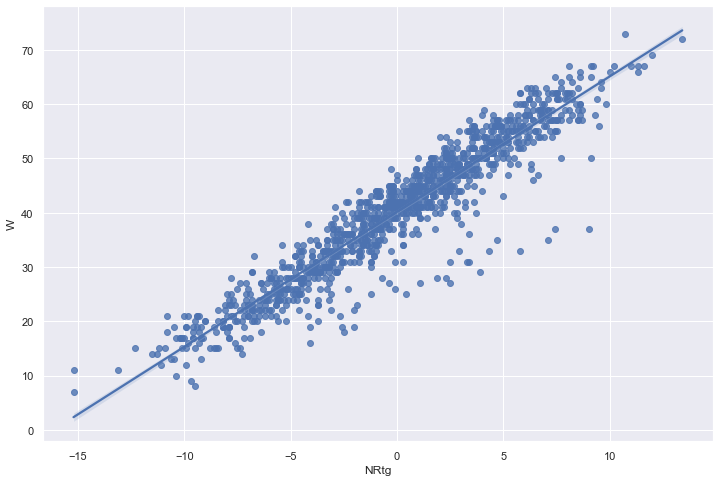

In [12]:
sns.regplot(x='NRtg', y='W', data=data)

<AxesSubplot:xlabel='TS%', ylabel='W'>

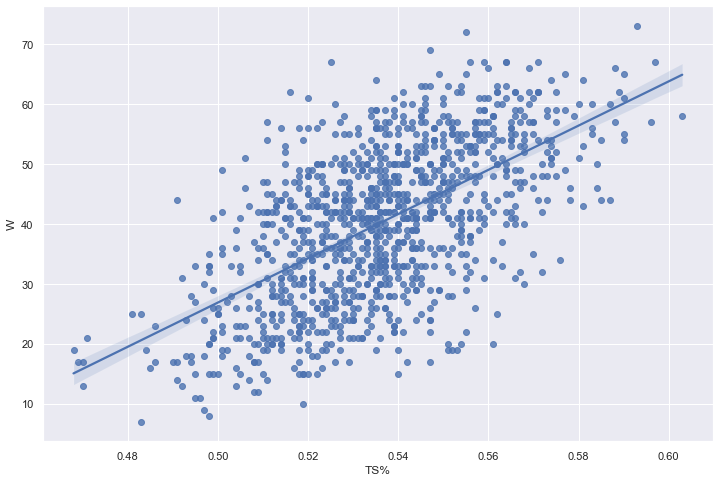

In [13]:
sns.regplot(x='TS%', y='W', data=data)

<AxesSubplot:xlabel='eFG%', ylabel='W'>

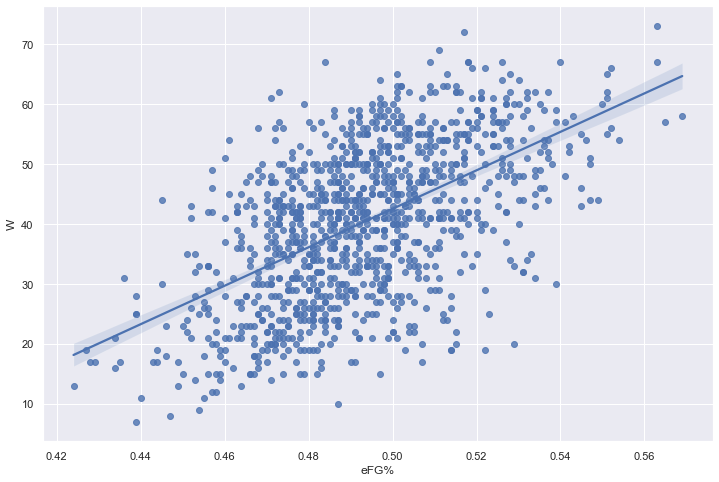

In [14]:
sns.regplot(x='eFG%', y='W', data=data)

<AxesSubplot:xlabel='TOV%', ylabel='W'>

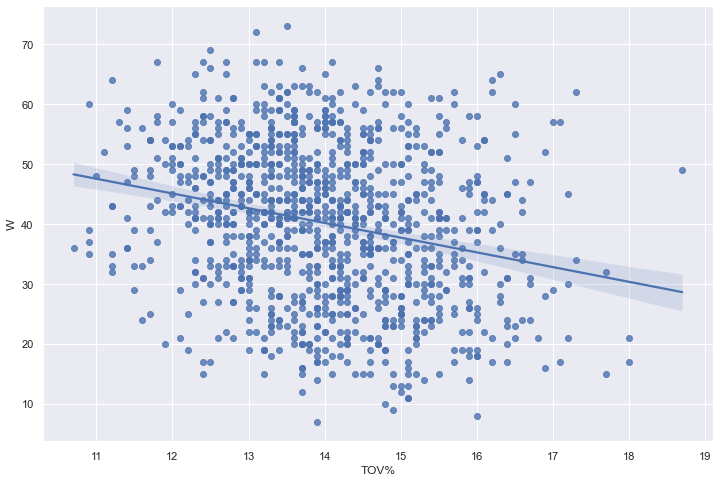

In [15]:
sns.regplot(x='TOV%', y='W', data=data)